<a href="https://colab.research.google.com/github/etappau/info5731/blob/master/Paul_selfstudy7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv'),
 PosixPath('/root/.fastai/data/imdb_sample/data_save.pkl')]

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [5]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [0]:
data_lm.save()

In [0]:
data = load_data(path)

In [9]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


In [10]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [11]:
data.train_ds[0][0]

Text xxbos xxmaj it seems like anybody can make a movie nowadays . xxmaj it 's like all you need is a camera , a group of people to be your cast and crew , a script , and a little money and xxunk you have a movie . xxmaj problem is that talent is n't always part of this xxunk and often times these kind of low budget films turn out to be duds . xxmaj the video store xxunk are filled with these so called films . xxmaj these are n't even guilty pleasures , they 're just a waste of celluloid that are better off forgotten . xxmaj troma xxmaj entertainment is known for making trash cinema , but most of their films are b movie gold . xxmaj however , some of the films they 've put out they had nothing to do with making and some , like ' xxmaj nightmare xxmaj weekend , ' did n't deserve any form of release at all . 
 
  xxmaj xxunk : xxmaj the cast members do the best they can with the lousy material . xxmaj some unintentional hilarity . xxmaj moves at a good pace ( xxmaj should at xxunk minute

In [12]:
data.train_ds[0][0].data[:10]

array([   2,    4,   16,  204,   50, 1163,   80,  114,   12,   26])

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [0]:
bs = 48

In [15]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/data_clas.pkl'),
 PosixPath('/root/.fastai/data/imdb/data_lm.pkl'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/models'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/test')]

In [16]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/pos'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat')]

In [0]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [19]:
data_lm.show_batch()

idx,text
0,"failed . xxmaj stupid , not funny . xxmaj tedious , not hilarious . xxmaj bad , not good . xxmaj that in a nutshell is all i can say for this video . xxbos xxmaj years after the fall of the last of the great corporations , the world has fallen into a new dark age where cyborgs are harvested for their parts . xxmaj cash , a female"
1,xxmaj iago is evil again ( xxmaj since when ? ! ) i know that these films are directly towards children but there was a time when all could enjoy xxmaj disney films . xxmaj even the movie 's musical number ( which had been xxmaj disney 's specialty for years ) stunk . i would n't recommend this film to anyone even the very young . xxmaj all i
2,"\n \n i got to ask though , what is it with xxmaj kari xxmaj wuhrer and horror / gore type films ? \n \n xxmaj it seems everything she has put out lately has been in this genre . xxmaj granted , i liked her in "" xxmaj eight - xxmaj legged xxmaj freaks "" and she was okay in "" xxmaj anaconda "" . xxmaj but"
3,"out like a xxup tv movie : a whole cast of commercial - quality actors , a poorly designed creature to be the "" bad guy , "" and a script that is more full of technical , political jargon and xxunk than it knows what to do with . \n \n i checked out the movie because of the creature ( i love to see what filmmakers have"
4,"it supports their claims and otherwise is not useful . \n \n xxmaj in any case , that belief is perfectly valid and sensible in the context of the character at the time . xxmaj so , if we accept that as the fact of life for these bible professors , then obviously the professor who went and invented the time machine is n't a very strong believer as"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


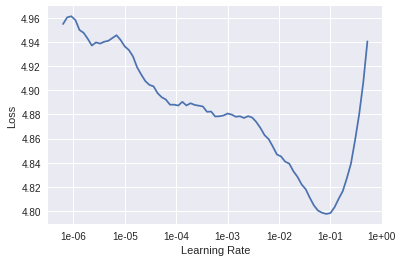

In [22]:
learn.recorder.plot(skip_end=15)

In [23]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.186569,4.053100,0.292954,1:32:44


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [25]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because it impressed me with the movie . The story is about a man who has to face his past . He 's all mad and he cares about his inner fears and this is just everything he has
I liked this movie because it reminds me of a man who has been a boss of the Ed Wood PAST and the Indian Director has before the Forces of Law . So when this film came


In [0]:
learn.save_encoder('fine_tuned_enc')

In [0]:
path = untar_data(URLs.IMDB)

In [0]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [30]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxup warning : xxup possible xxup spoilers ( but not really - keep reading ) . xxmaj ahhh , there are so many reasons to become utterly addicted to this spoof gem that i wo n't have room to list them all . xxmaj the opening credits set the playful scene with kitsch late 1950s cartoon stills ; an enchanting xxmaj xxunk ' xxmaj prez ' xxmaj prado mambo",pos
"xxbos xxmaj on xxmaj sunday xxmaj july 27 , 1997 , the first episode of a new science fiction series called "" xxmaj stargate xxup sg-1 "" was broadcast on xxmaj showtime . a spin - off of and sequel to the 1994 film "" xxmaj stargate "" starring xxmaj kurt xxmaj russell and xxmaj james xxmaj spader , the series begins approximately one year after the events portrayed in",pos
"xxbos xxmaj the xxmaj war xxmaj between the xxmaj states was perhaps the darkest hour in the history of xxmaj america ; a war that pitted brother against brother and family against family and left scars that even today have not yet healed , and in all probability never will . xxmaj and , as in any story about any war , beyond any historical significance it is the personal",pos
"xxbos xxmaj after reading the previous comments , i 'm just glad that i was n't the only person left confused , especially by the last 20 minutes . xxmaj john xxmaj carradine is shown twice walking down into a grave and pulling the lid shut after him . i anxiously awaited some kind of explanation for this odd behavior ... naturally i assumed he had something to do with",neg


In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


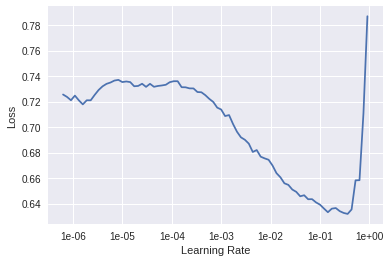

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.471491,0.339574,0.852640,12:43


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [35]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.389377,0.286968,0.882200,13:57


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [36]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.304428,0.206218,0.918560,19:30


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [37]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.289180,0.196910,0.922200,23:33


RuntimeError: ignored

In [38]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([2.9521e-05, 9.9997e-01]))